# STEP 1:  Problem Statement

    Amongst the key drivers of business sustainability is the ability of a company to efficiently manage resources  and also continuously increase profit margin. being able to drive efficiency and productivity is a very critical part of modern conversation.
        As a result of this, ABC Agricultural limited which has recorded a 3million dollars in the past two years critically need to reduce overhead cost and increase profit margin.
    
    PROPOSED SOLUTION: To build a model that will help predict the flowers breed correctly for production purposes. this solution will help ABC to reduce cost, time and resources.
    Predict the flowers(target/output) of a flower given the flower specifications(predictor/input) 

    Problem type - classification problem (Multiclass)

# STEP 2: Business understanding 

    - Based on the fictional problem statement, we understood that the flowers breed takes time & more human labour to classify and it alters productivity and terrible time management ....

# STEP 3: Hypothesis Generation

<b> Hypothesis <b>: An assumption which may be true or not (in a simple definition: think of hypothesis as a factor likely to affect or influence a problem one is trying to solve.

To avoid boiling the ocean; its a good practice to generate hypothesis. but in this scenario we may not see the importance/impact of hypothesis here. Irrespective of its importance visibility’s  here or not; lets generate... <br><br>
    <li>  The length of a flower is likely to indicate the flower breed <br>
    <li>  The width of a flower is likely to indicate the flower breed
        
        hint: based on the hypothesis above, we look for fields with similar keywords (data dictionary can help better); the keywords are length & width
    
    Why hypothesis? In the case of 500 fields or columns; as an example, its advisable to leverage on hypothesis generated to explore what may matters towards the objective; so a data scientist dont waist time exploring what matters not

# STEP 4: Data Gathering & Cleaning 

    Based on your research & understanding of the business problem, We need to gather all necessary data needed for this project: to make it so simple, the data for this project has been made available as an excel file.
<br><br>Lets read the excel file and do some cleaning.
<br><br><b>NB: in real life; most times, you connect & read from the database directly (so, you must know SQL)<b>

In [1]:
#import necessary libraries needed for this project

#mathematical operation (linear algebra)
import numpy as np 

#data preprocessing
import pandas as pd 

#data visualiaztion
import matplotlib.pyplot as plt 

#advance data visualization (built on matplotib)
import seaborn as sns 

#split observations/records into 2 or more Distributions
from sklearn.model_selection import train_test_split 

#algorithm to learn from the input and predict the output
from sklearn.tree import DecisionTreeClassifier

#evaluation metrics 1 for classification (know the accuracy score of a model)
from  sklearn.metrics import accuracy_score 

#evaluation metrics 2 for classification (know the variation of real value to predicted value of a model)
from sklearn.metrics import confusion_matrix 

#save a trained model to disk
import pickle

#### Data Exploration

In [2]:
"""
To read an excel data, pandas library must be initiated or called, since pandas as been imported as pd, 
anything pandas is needed you use pd instead.

pd - an acronym for pandas
read_csv()- a function/method to read csv files
df = a variable name that contains/store the read file. any name convention can be used.

"""
df = pd.read_csv('flower.csv')

In [3]:
"""
head() - print top 5 of the columns by default, to change the default value try passing an argument(a value)
e.g try head(10) to see top 10

it always good to have a quick overview of how your dataset looks like- you can use head(), tail(), sample().
"""
df.head()

,petal_length,petal_width,sepal_length,sepal_width,flower_breed
0,3.5,2.3,7.2,5.6,Flower A
1,3.5,2.3,7.0,5.1,Flower A
2,3.4,2.3,6.8,5.3,Flower A
3,3.6,2.3,6.7,5.2,Flower A
4,3.5,2.3,7.1,5.7,Flower A


In [4]:
#print all the columns name
df.columns

Index(['petal_length', 'petal_width', 'sepal_length', 'sepal_width',
       'flower_breed'],
      dtype='object')

<b>Observation:<b><br>
    <li>There exist 5 different unique columns in the dataset i.e 4 inputs & 1 output(Flower_Breed)
    <li>Column names are well spelled and all are in snake case format.

In [5]:
#print all columns data types
df.dtypes

petal_length    float64
petal_width     float64
sepal_length    float64
sepal_width     float64
flower_breed     object
dtype: object

<b>Observation:<b><br>
    <li>all inputs are numerical (float)
    <li>output column(flower breed) exist in an object state (i.e categorical); so we need to convert object datatypes to numerical datatypes in the Feature Engineering stage of this project.
        Why? An algorithm learns with numerical values. 

In [6]:
#check unique values of flower breed
df['flower_breed'].unique()

array(['Flower A', 'Flower C', 'Flower B'], dtype=object)

<b>Observation:<b><br>
    <li>There are 3 different (unique) flowers in the flower breed

In [7]:
#check missing values
df.isna().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
flower_breed    0
dtype: int64

<b>Observation:<b><br>
    <li>There are no missing values in the dataset, since all values are 0s

In [8]:
#check statictical summary of all numerical columns
df.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.858000,3.299333,7.943333,5.157333
std,1.765298,0.762238,0.828066,0.435866
min,3.100000,2.200000,6.400000,4.100000
25%,3.700000,2.400000,7.200000,4.900000
50%,6.450000,3.400000,7.900000,5.100000
75%,7.200000,3.900000,8.500000,5.400000
max,9.000000,4.600000,10.000000,6.500000


<b>Observation:<b><br>
    <li>the min & max values of all input are in close range (no need to normalize) and,
    <li> similarly for the output as well ranging from 0.1 - 2.5
    <li> 25% of sepal width tells us that 75% of the distribution lies above 4.9
    <li> 50%(median) of sepal length tells us that 50% of the distribution lies above 7.9    
    <li> 75% of petal length tells us that 25% of the distribution lies above 7.2
        
<b>Note: percentile are only explain in this projects, other practical projects will explain other statistical value

In [9]:
"To ease the understanding of percentile above, see each percentile output and map it to what it tells again"

#check 25 percentile count
print('25 percentile counts of sepal width is', df[df['sepal_width']>=4.9]['sepal_width'].count())

#check 50 percentile count
print('50 percentile counts of sepal length is', df[df['sepal_length']>=7.9]['sepal_length'].count())

#check 75 percentile count
print('75 percentile counts of petal length is ', df[df['petal_length']>= 7.2]['petal_length'].count())

25 percentile counts of sepal width is 117
50 percentile counts of sepal length is 77
75 percentile counts of petal length is  34


    Observation
    In summary, we have completed data exploration by checking column names, missing values & statistical data description; all data are in good shape for modelling except in the case of converting object(categorical column) to numerical of which we 'll handle in the feature engineering stage. and also we cant tell yet whether the 4 inputs are enough to distinguish the flower breed(output).
    Lets dive in EDA (Exploratory data analysis) leveraging on the hypothesis we generated to get more insights on how we can make the mapping for prediction more easier.
    
    The two hypothesis generated talks about the likehood of the width & length been a factor that influence a flower breed. the idea here; is to explore related columns with width & length

# STEP 5: Exploratory data analysis

EDA - analysing your dataset to get meaniful insight for the business.<br>
 Facts about EDA: 
        <li> It can carried out be graphically, non-grahically or both
        <li> Its mainly classified into Univariate, Bivariate & Multivariate Analysis

## Univariate analysis  - 1 variable analysis

In [10]:
#frequency/distribution of each flower breed class
df['flower_breed'].value_counts() #non-graphical analysis (a bar chart is the graphical analysis for value_counts)

Flower A    50
Flower C    50
Flower B    50
Name: flower_breed, dtype: int64

#### Observation - The flower breed are equally distributed 

In [11]:
#frequency/distribution of each petal width values
df['petal_width'].value_counts() #non-graphical analysis

2.3    29
3.4    13
3.9    12
3.6    12
3.5     8
4.4     8
3.1     7
2.5     7
2.4     7
4.2     6
4.1     6
2.2     5
3.3     5
4.0     5
3.7     4
4.6     3
4.3     3
4.5     3
3.2     3
3.8     2
2.7     1
2.6     1
Name: petal_width, dtype: int64

<b>Observation<b><br>
<li>The highest reoccuring petal width is 2.3cm with a frequency of 29x
<li>The Lowest reoccuring petal width are 2.6cm & 2.7cm respectively occuring just ones<b>

Text(0, 0.5, 'Count')

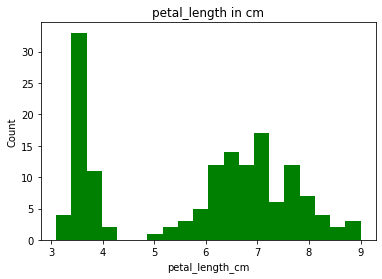

In [12]:
#graphical analysis
plt.hist(df['petal_length'], bins = 20, color = "green")
plt.title("petal_length in cm")
plt.xlabel("petal_length_cm")
plt.ylabel("Count")

In [13]:
#non-grahical analysis (petal length)
df['petal_length'].value_counts()

3.5    13
3.6    13
7.2     8
6.6     8
3.7     7
3.4     7
7.7     6
6.8     5
7.0     5
6.1     5
6.3     4
7.1     4
6.5     4
6.9     4
3.8     4
6.0     3
6.7     3
7.8     3
6.2     3
7.6     3
8.2     3
7.9     3
5.4     2
7.5     2
8.8     2
7.4     2
8.0     2
8.1     2
3.3     2
6.4     2
4.0     2
5.6     2
7.3     2
5.1     1
3.2     1
5.8     1
5.9     1
8.7     1
8.4     1
3.1     1
9.0     1
5.7     1
8.5     1
Name: petal_length, dtype: int64

Note: both graphical & non graphical tells us the same thing. but graphical analysis speaks well about the actual value. For lab developement (use more of graphical) & for presentation purpose focus on graphical

## Cummulative distribution  fxn
 - cummulative dist. fxn.(CDF) is the probability that the random variable X will take a value less than or equal to x
 
<b>to better understand what CDF communicate to us, lets see CDF in action<b>

/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-p

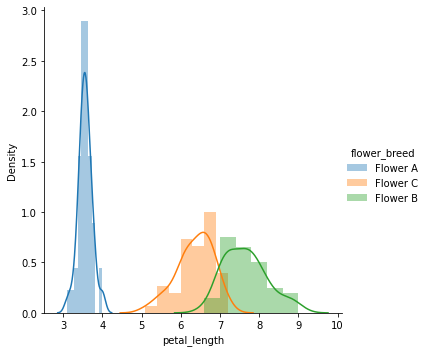

In [14]:
sns.FacetGrid(df, hue="flower_breed", size=5).map(sns.distplot, "petal_length").add_legend()

<b>Observation:<b>
    <li>With petal length; we can build a simple model that can separate Flower A from B & C easily.
    <li>Flower B & C overlaps, its so hard to separate flower B from C with petal length alone

/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-p

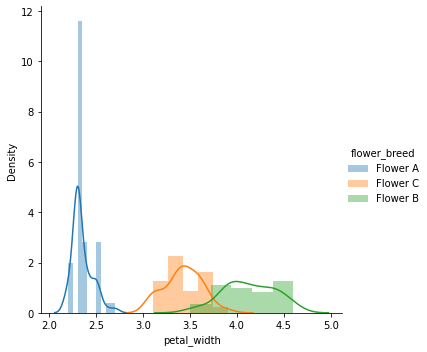

In [15]:
sns.FacetGrid(df, hue="flower_breed", size=5).map(sns.distplot, "petal_width").add_legend()

<b>Observation:<b>
    <li>With petal width; we can also build a simple model that can separate Flower A from B & C.
    <li>Flower B & C still overlaps petal width, its so hard to separate flower B from C with petal width as well

/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-p

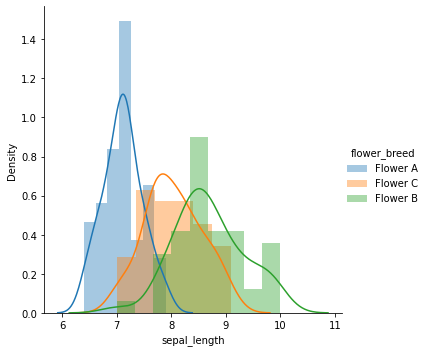

In [16]:
sns.FacetGrid(df, hue="flower_breed", size=5).map(sns.distplot, "sepal_length").add_legend()

<b>Observation:<b>
    <li>With sepal length; its so hard separate the 3 classes of flower as they all overlaps each other.

/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cowrywise/opt/anaconda3/lib/python3.9/site-p

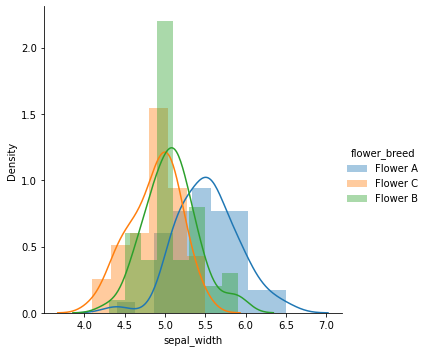

In [17]:
sns.FacetGrid(df, hue="flower_breed", size=5).map(sns.distplot, "sepal_width").add_legend()

<b>Observation:<b>
    <li>With sepal width; its so much harder separate the 3 classes of flower as they all overlaps each other.

    Observation
    In summary, from our histogram; without building a model or getting to feature importance stage, we can easily tell that petal length & width will be the best features to separate the 3 classes. lets focus more on petal length in our further analysis to tell how accurate petal length will be in predicting the 3 classes

In [18]:
df.flower_breed

0      Flower A
1      Flower A
2      Flower A
3      Flower A
4      Flower A
         ...   
145    Flower B
146    Flower B
147    Flower B
148    Flower B
149    Flower B
Name: flower_breed, Length: 150, dtype: object

In [19]:
flower_a= df.loc[df["flower_breed"]== 'Flower A'];
flower_b= df.loc[df["flower_breed"]== 'Flower B'];
flower_c= df.loc[df["flower_breed"]== 'Flower C'];

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[3.1  3.19 3.28 3.37 3.46 3.55 3.64 3.73 3.82 3.91 4.  ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[6.6  6.84 7.08 7.32 7.56 7.8  8.04 8.28 8.52 8.76 9.  ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[5.1  5.31 5.52 5.73 5.94 6.15 6.36 6.57 6.78 6.99 7.2 ]


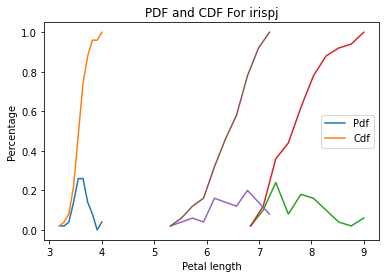

In [20]:
#Flower A
counts, bin_edges = np.histogram(flower_a['petal_length'], bins=10, density = True) 
pdf = counts/(sum(counts)) 
print(pdf); 
print(bin_edges) 
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf) 
plt.plot(bin_edges[1:], cdf) 

#Flower b
counts, bin_edges = np.histogram(flower_b['petal_length'], bins=10, density = True) 
pdf = counts/(sum(counts)) 
print(pdf); 
print(bin_edges) 
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf) 
plt.plot(bin_edges[1:], cdf)

#Flower c
counts, bin_edges = np.histogram(flower_c['petal_length'], bins=10,  density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For irispj')
plt.xlabel("Petal length")
plt.gca().legend(('Pdf','Cdf'))
plt.ylabel("Percentage")

plt.show();

NB: lest focus on CDF for now, we would explore PDF in the next project series

Observation:
    <li> CDF tells us here: <br>flower_a will be 100% accurate in prediction all the time using petal length feature only <br>flower_b will be 70% accurate in prediction all the time using petal length feature only <br>flower_c will be 76% accurate in prediction all the time using petal length feature only

In [21]:
#Query to know the actual value of accuracy (quick calculation)

#### Flower A

In [22]:
#what is the maximum length of Petal_Length of flower a?
df[(df['petal_length']<= 4.0) & (df['flower_breed'] == 'Flower A')]['petal_length'].max()

4.0

In [23]:
#query petal length less than 4 - Flower A
df[df['petal_length'] <= 4]['petal_length'].count()

50

In [24]:
50/50 * 100

100.0

#### Flower B

In [25]:
#what is the minimum length of Petal_Length of flower b?
df[(df['petal_length']> 6.5) & (df['flower_breed'] == 'Flower B')]['petal_length'].min()

6.6

In [26]:
#what is the maximum length of Petal_Length of flower b?
df[(df['petal_length']> 6.5) & (df['flower_breed'] == 'Flower B')]['petal_length'].max()

9.0

In [27]:
#query petal length greater than 5 & less than or equal to 7.2 - Flower B
df[(df['petal_length']>= 6.6) & (df['petal_length'] <= 9)]['petal_length'].count()

71

In [28]:
50/71 * 100

70.4225352112676

#### Flower C

In [29]:
#what is the minimum length of Petal_Length of flower c?
df[(df['petal_length']> 5) & (df['flower_breed'] == 'Flower C')]['petal_length'].min()

5.1

In [30]:
#what is the maximum length of Petal_Length of flower c?
df[(df['petal_length']> 5) & (df['flower_breed'] == 'Flower C')]['petal_length'].max()

7.199999999999999

In [31]:
df[(df['petal_length']>= 5.1) & (df['petal_length'] <= 7.2)]['petal_length'].count()

66

In [32]:
50/66*100

75.75757575757575

Comment: since a single feature cant seperate flower_b from flower_c correctly, lets see the combination two or more features

### Bivariate Analysis - 2 variable analysis

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

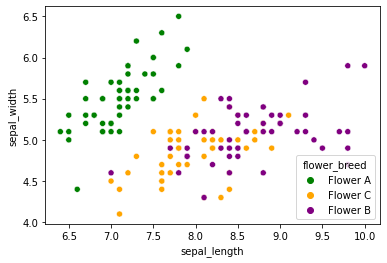

In [33]:
#plot sepal length against sepal width
sns.scatterplot(data =df, x='sepal_length', y='sepal_width', hue='flower_breed', marker='o', palette=['green','orange','purple'])

In [34]:
#check correlation btw two variables
df['sepal_length'].corr(df['sepal_width'])

-0.1175697841330021

#### Observations

1. Using (Sepal_Length and Sepal_Width Features, we can distnguish flower_a flower from Other Classes i.e linearly separable.
2. Seperate flower_b from flower_c is much harder as they have overlap i.e is not linearly separable i.e using two features cant separate other classes.
34. There is a weak negative corelation between the variables i.e an sepal length increases sepal width decrease (weak pattern)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

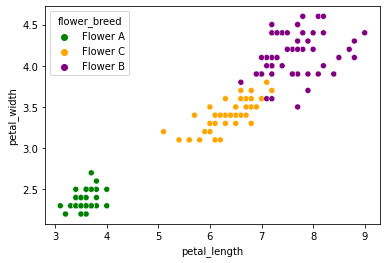

In [35]:
#plot petal length against petal width
sns.scatterplot(data =df, x='petal_length', y='petal_width', hue='flower_breed', marker='o', palette=['green','orange','purple'])

In [36]:
df['petal_length'].corr(df['petal_width'])

0.962865431402797

#### Observation on this chart compare to others (assignment)

1. As Petal length increases, the Petal width increases; its a positive corelation (strong pattern)
2. flower_a is very separable
3. flower_b & c are better seperable unlike using petal length feature along i.e the interction petal & width will help to classify the flower breed more better

## Multivariate Analysis

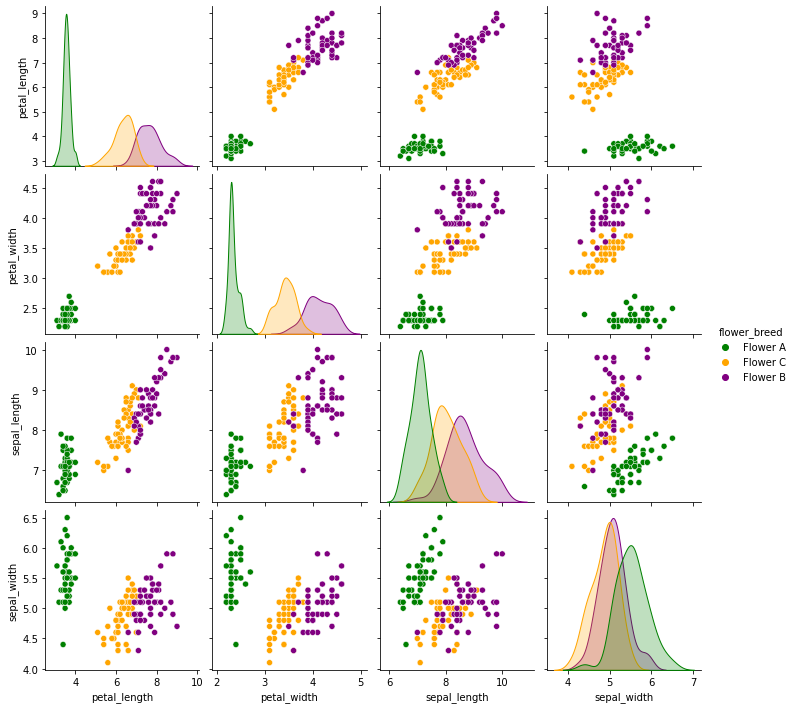

In [37]:
sns.pairplot(df, hue='flower_breed', palette=['green','orange','purple'])

   -  look carefully, We have 16 charts (4 PDF or Histogram chart(diagonal), 12 Scattered Plot) & 6 Unique plot
   -  4C2 = 6 different plots i.e i can only have 6 different plots or combinations (the rest are the same just axis are swapped; e.g petal length(x-axis) & petal width (y-axis) and petal length(y-axis) & petal width (x-axis)) 
   - 4 : number of features in any axis (x or y) and 2 : no of plot combination that exist. 
   
   In summary 6 plots are unique for analysis


#### Observations:

    1. Petal length and Petal width can easily seperate flower_a than Sepal Length and Sepal width
    2. We can build a very simple model by drawing a simple boundary box using ifelse statement and boolean operator
    (a basic feature engineering) 
    3. Without model interpretability, we know clearly here that Petal length and Petal width are the most important feature

# STEP 6: Feature Engineering 

In [38]:
#a fxn to help separate the flower breed
def FeatEng(data):
    if data.petal_length <=4:
        return 'flower_a'
    elif data.petal_length >4 and data.petal_length <=6.8:
        return 'flower_c'
    else:
        return 'flower_b'
df['LikeSep'] = df.apply(lambda data:FeatEng(data), axis=1)

In [39]:
#from index 100 -109 - just a quick look
df[100:110]

,petal_length,petal_width,sepal_length,sepal_width,flower_breed,LikeSep
100,8.1,4.6,8.4,5.4,Flower B,flower_b
101,7.2,4.0,7.9,4.8,Flower B,flower_b
102,8.0,4.2,9.2,5.1,Flower B,flower_b
103,7.7,3.9,8.4,5.0,Flower B,flower_b
104,7.9,4.3,8.6,5.1,Flower B,flower_b
105,8.7,4.2,9.7,5.1,Flower B,flower_b
106,6.6,3.8,7.0,4.6,Flower B,flower_c
107,8.4,3.9,9.4,5.0,Flower B,flower_b
108,7.9,3.9,8.8,4.6,Flower B,flower_b
109,8.2,4.6,9.3,5.7,Flower B,flower_b


<b>Observation:<b>
        Look carefully the target column & the newly engineered column(like sep); its seems like we have almost classified the flower breed without training a model: the power of feature engineering

In [40]:
#replace categorical to numerical value for training purpose.
df['flower_breed'] = df['flower_breed'].map({'Flower C': 3, 'Flower A': 1, 'Flower B': 2})

In [41]:
#encode newly generated columns to numerical value - norminal enconding is used since classes has no ranking
df =pd.get_dummies(data=df, columns=['LikeSep'])

In [42]:
#from index 50 - 55- just a quick look on the tranmsformation
df[50:55]

,petal_length,petal_width,sepal_length,sepal_width,flower_breed,LikeSep_flower_a,LikeSep_flower_b,LikeSep_flower_c
50,6.8,3.5,9.1,5.3,3,0,1,0
51,6.6,3.6,8.5,5.3,3,0,0,1
52,7.0,3.6,9.0,5.2,3,0,1,0
53,6.1,3.4,7.6,4.4,3,0,0,1
54,6.7,3.6,8.6,4.9,3,0,0,1


In [43]:
#drop LikeSep_flower_c to avoid noise in the modelling
df= df.drop(['LikeSep_flower_c'], axis=1)

In [44]:
#last five - a quick look
df.tail()

,petal_length,petal_width,sepal_length,sepal_width,flower_breed,LikeSep_flower_a,LikeSep_flower_b
145,7.3,4.4,8.8,5.1,2,0,1
146,7.1,4.0,8.4,4.6,2,0,1
147,7.3,4.1,8.6,5.1,2,0,1
148,7.5,4.4,8.3,5.5,2,0,1
149,7.2,3.9,8.0,5.1,2,0,1


# STEP 7:  Modelling 

In [45]:
#separate the input from the output- x takes the input and y takes the output
x =df.drop(['flower_breed'], axis =1)
y =df.flower_breed

In [46]:
x

,petal_length,petal_width,sepal_length,sepal_width,LikeSep_flower_a,LikeSep_flower_b
0,3.5,2.3,7.2,5.6,1,0
1,3.5,2.3,7.0,5.1,1,0
2,3.4,2.3,6.8,5.3,1,0
3,3.6,2.3,6.7,5.2,1,0
4,3.5,2.3,7.1,5.7,1,0
...,...,...,...,...,...,...
145,7.3,4.4,8.8,5.1,0,1
146,7.1,4.0,8.4,4.6,0,1
147,7.3,4.1,8.6,5.1,0,1
148,7.5,4.4,8.3,5.5,0,1


In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: flower_breed, Length: 150, dtype: int64

In [48]:
#split into 80 -20: 80 for training, 20 for evaluating the model performace
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [49]:
x_train

,petal_length,petal_width,sepal_length,sepal_width,LikeSep_flower_a,LikeSep_flower_b
91,6.7,3.5,8.2,5.1,0,0
135,8.2,4.4,9.8,5.1,0,1
69,6.0,3.2,7.7,4.6,0,0
128,7.7,4.2,8.5,4.9,0,1
114,7.2,4.5,7.9,4.9,0,1
...,...,...,...,...,...,...
133,7.2,3.6,8.4,4.9,0,1
137,7.6,3.9,8.5,5.2,0,1
72,7.0,3.6,8.4,4.6,0,1
140,7.7,4.5,8.8,5.2,0,1


In [50]:
y_train

91     3
135    2
69     3
128    2
114    2
      ..
133    2
137    2
72     3
140    2
37     1
Name: flower_breed, Length: 120, dtype: int64

In [51]:
x_test

,petal_length,petal_width,sepal_length,sepal_width,LikeSep_flower_a,LikeSep_flower_b
14,3.3,2.3,7.9,6.1,1,0
98,5.1,3.2,7.2,4.6,0,0
75,6.5,3.5,8.7,5.1,0,0
16,3.4,2.5,7.5,6.0,1,0
131,8.5,4.1,10.0,5.9,0,1
56,6.8,3.7,8.4,5.4,0,1
141,7.2,4.4,9.0,5.2,0,1
44,4.0,2.5,7.2,5.9,1,0
29,3.7,2.3,6.8,5.3,1,0
120,7.8,4.4,9.0,5.3,0,1


In [52]:
y_test

14     1
98     3
75     3
16     1
131    2
56     3
141    2
44     1
29     1
120    2
94     3
5      1
102    2
51     3
78     3
42     1
92     3
66     3
31     1
35     1
90     3
84     3
77     3
40     1
125    2
99     3
33     1
19     1
73     3
146    2
Name: flower_breed, dtype: int64

In [53]:
#Instantiate an algorithm to learn from the data 
mod_dt = DecisionTreeClassifier(random_state = 1)

In [54]:
#training/learning from input & output of 80%
model = mod_dt.fit(x_train,y_train)

In [55]:
# save the trained model to disk
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [56]:
#predict on 20%
prediction=model.predict(x_test)

In [57]:
#check accuracy of test set
accuracy = accuracy_score(y_test, prediction)

In [58]:
accuracy

0.9666666666666667

- Note: To avoid Accuracy paradox, Accuracy is not enough to evaluate a model performance:
- Why? the overall accuracy is influenced by flower_a(100%). accuracy score is the average score computed for all classes

In [59]:
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   1  2   3
Actual              
1          11  0   0
2           0  6   0
3           0  1  12


<b> Observation <b><br>
    - with confusion matrix, we have more clearity on the model performance compare to accuracy.<br>
    - for flower_a(1) - our model is 100% accurate: out of 11 random classes, all were predicted correctly<br>
    - for flower_b(2) - our model is 99.8% accurate: out of 7 random classes, 6 were predicted correctly & 1 was misclassified as flower_c<br>
    - for flower_c(3) - our model is 100% accurate: out of 12 random classes, all were predicted correctly

#### Model Explainability & Interpretability;
    we would limit this part to feature importance only, in the next series, we would explore more technical concept in explaining & interpreting model performance

<AxesSubplot:xlabel='importance', ylabel='feature'>

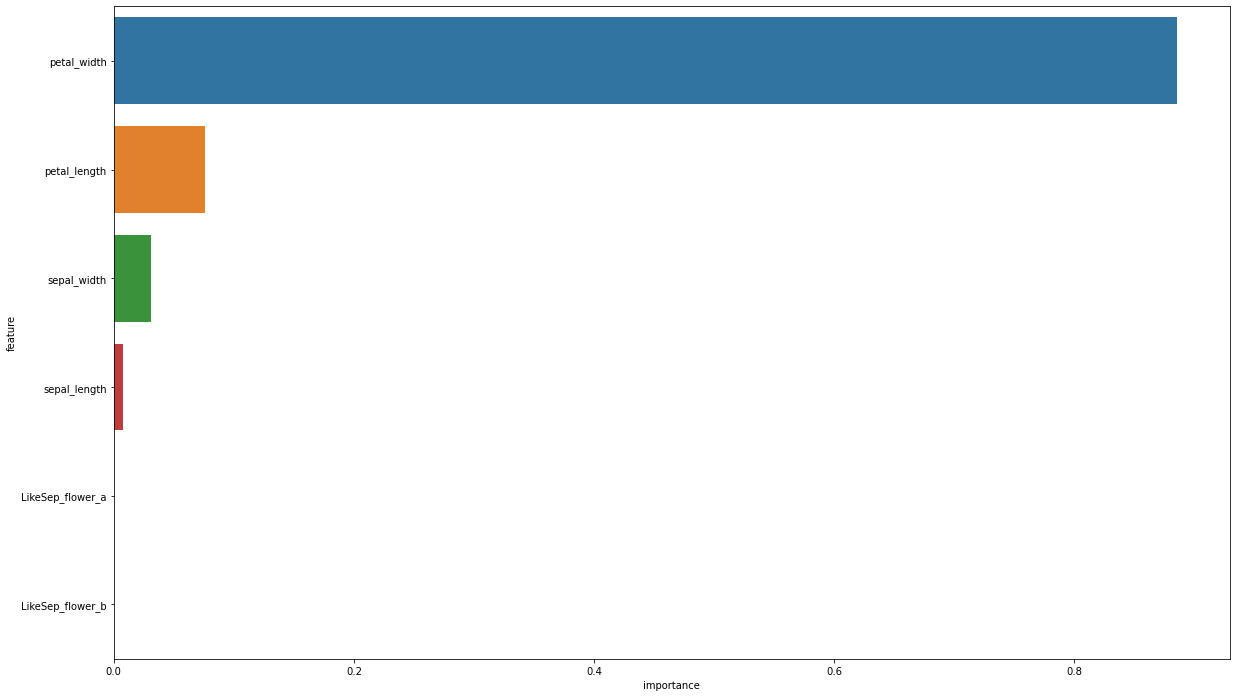

In [60]:
#plot feature importance 
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = x_train.columns
plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))

<b>Observation:<b>
 -petal width was the best feature in separating the classes, then petal_length take the next impact (of courses we have seen this ahead before modelling

Recommendation:
    <li> Since flower_a & c are 100% accurate in prediction, employees are to give attention/supervise flower_c inorder reduce their workload
    <li> from statistical analysis; we confirmed that flower_a needs no employee attention, the model(robot) can harvest flower_a without any assistance
    <li> though we had an 100% accuarcy in our machine learning part, for flower_c, but statistically we struggle a bit to isolate it from flower_b, its advisable that employees gives a bit of attention to flower_c as well i.e after the machine has finished the harvest, flower_b & c needs to be confirmed before putting them out for sales.
    In summary, more attention to to flower_b, less attention to flower_c & no attention to flower_a 

    Hint: the obersvation generated was for learning purposes, try to focus on what matter to the business as your observation then make this your first ML project. keep this in a project folder, as we 'll call back on this project for deployment & presentation puporses.

If any question arises why practicing: feel free to reach out to ahmed.adegunle@outlook.com